# W14 - Heart Disease Analysis


## Task:
-Data Preparation / Cleaning

-EDA

-Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)

-Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, -Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest. (choose at least 3)

-Create short conclusion about the modeling results

## About this dataset:
-Age : Age of the patient

-Sex : Sex of the patient

-exang: exercise induced angina (1 = yes; 0 = no)

-ca: number of major vessels (0-3)

-cp : Chest Pain type chest pain type

-Value 1: typical angina

-Value 2: atypical angina

-Value 3: non-anginal pain

-Value 4: asymptomatic

-trtbps : resting blood pressure (in mm Hg)

-chol : cholestoral in mg/dl fetched via BMI sensor

-fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

-rest_ecg : resting electrocardiographic results

-Value 0: normal


-Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

-thalach : maximum heart rate achieved

-target : 0= less chance of heart attack 1= more chance of heart attack

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Data Preparation / Cleaning

In [59]:
# Load the dataset
df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [60]:
# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [61]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [62]:
# Check data types
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [63]:
# Check summary statistics
print(df.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

# EDA 

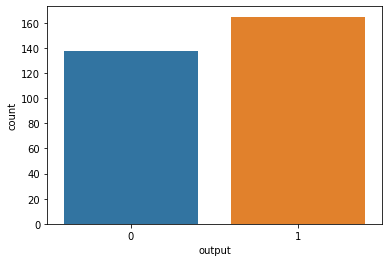

In [64]:
# Visualize the distribution of the target variable
sns.countplot(x='output', data=df)
plt.show()

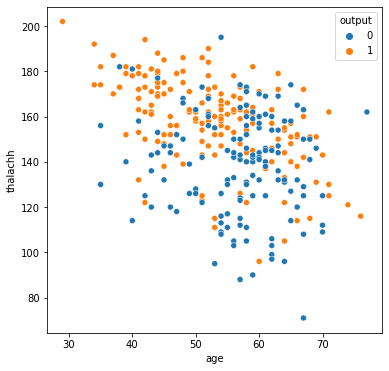

In [66]:
# Explore the relationship between age and maximum heart rate
plt.figure(figsize=(6, 6))
sns.scatterplot(x='age', y='thalachh', hue='output', data=df)
plt.show()

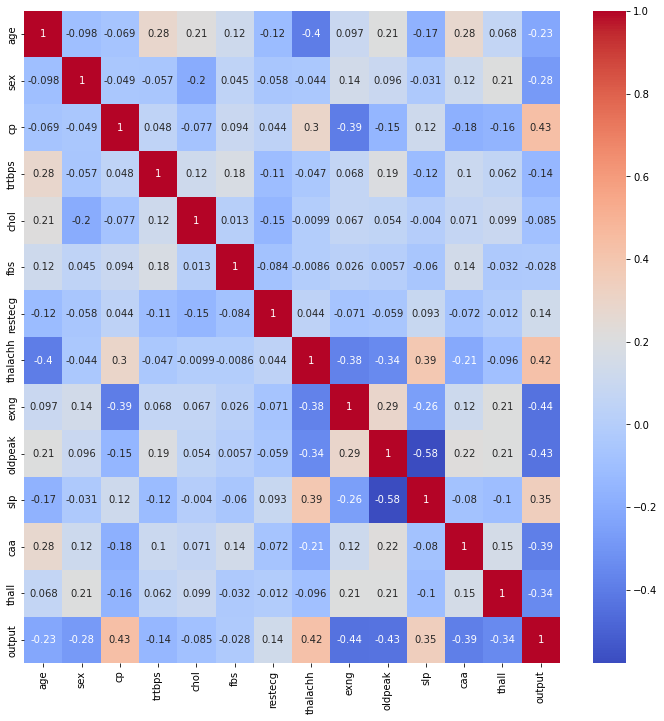

In [37]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Compare two different variables and provide short analysis

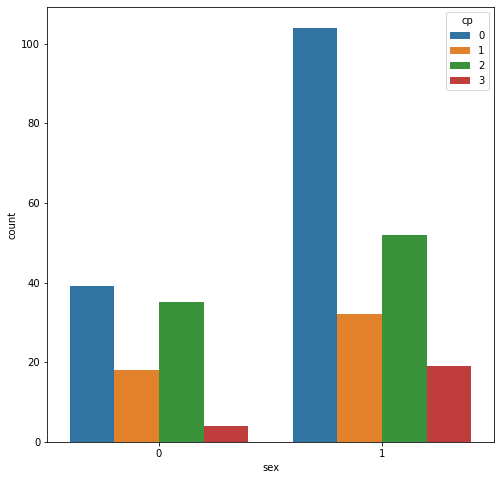

In [45]:
# Compare 'sex' and 'cp'
plt.figure(figsize=(8, 8))
sns.countplot(x='sex', hue='cp', data=df)
plt.show()

# Create model for analysis (Classification)

In [48]:
# Split the data into features and target variable
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train models
models = {
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

K-Nearest Neighbor Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Gaussian Naive Bayes Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87

# Short Conclusion about the Modeling Results

Based on the accuracy and classification reports, we can compare the performance of different models and draw conclusions about which models perform better for this specific dataset. And consider factors like precision, recall, and F1-score to evaluate model performance comprehensively.